In [130]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from PIL import ImageDraw
import tensorflow as tf
import random
from collections import deque
plt.style.use({'figure.figsize':(10, 10)})
pd.set_option('max_rows', 300)

In [131]:
States=np.array(['L60D0/30/H0','L180D0/30/H0','L250D0/30/H0','L300D0/30/H0',
'L60D30/60/H0','L180D30/60/H0','L250D30/60/H0','L300D30/60/H0',
'L60D60/90/H0','L180D60/90/H0','L250D60/90/H0','L300D60/90/H0',
'L60D90/120/H0','L180D90/120/H0','L250D90/120/H0','L300D90/120/H0',
'L60D120/150/H0','L180D120/150/H0','L250D120/150/H0','L300D120/150/H0',
'L60D150/180/H0','L180D150/180/H0','L250D150/180/H0','L300D150/180/H0',
'L60D180/210/H0','L180D180/210/H0','L250D180/210/H0','L300D180/210/H0',
'L60D210/240/H0','L180D210/240/H0','L250D210/240/H0','L300D210/240/H0',
'L60D240/270/H0','L180D240/270/H0','L250D240/270/H0','L300D240/270/H0',
'L60D270/300/H0','L180D270/300/H0','L250D270/300/H0','L300D270/300/H0',
'L60D300/330/H0','L180D300/330/H0','L250D300/330/H0','L300D300/330/H0',
'L60D330/360/H0','L180D330/360/H0','L250D330/360/H0','L300D330/360/H0',
'L60D0/30/H1','L180D0/30/H1','L250D0/30/H1','L300D0/30/H1',
'L60D30/60/H1','L180D30/60/H1','L250D30/60/H1','L300D30/60/H1',
'L60D60/90/H1','L180D60/90/H1','L250D60/90/H1','L300D60/90/H1',
'L60D90/120/H1','L180D90/120/H1','L250D90/120/H1','L300D90/120/H1',
'L60D120/150/H1','L180D120/150/H1','L250D120/150/H1','L300D120/150/H1',
'L60D150/180/H1','L180D150/180/H1','L250D150/180/H1','L300D150/180/H1',
'L60D180/210/H1','L180D180/210/H1','L250D180/210/H1','L300D180/210/H1',
'L60D210/240/H1','L180D210/240/H1','L250D210/240/H1','L300D210/240/H1',
'L60D240/270/H1','L180D240/270/H1','L250D240/270/H1','L300D240/270/H1',
'L60D270/300/H1','L180D270/300/H1','L250D270/300/H1','L300D270/300/H1',
'L60D300/330/H1','L180D300/330/H1','L250D300/330/H1','L300D300/330/H1',
'L60D330/360/H1','L180D330/360/H1','L250D330/360/H1','L300D330/360/H1',
'L60D0/30/H2','L180D0/30/H2','L250D0/30/H2','L300D0/30/H2',
'L60D30/60/H2','L180D30/60/H2','L250D30/60/H2','L300D30/60/H2',
'L60D60/90/H2','L180D60/90/H2','L250D60/90/H2','L300D60/90/H2',
'L60D90/120/H2','L180D90/120/H2','L250D90/120/H2','L300D90/120/H2',
'L60D120/150/H2','L180D120/150/H2','L250D120/150/H2','L300D120/150/H2',
'L60D150/180/H2','L180D150/180/H2','L250D150/180/H2','L300D150/180/H2',
'L60D180/210/H2','L180D180/210/H2','L250D180/210/H2','L300D180/210/H2',
'L60D210/240/H2','L180D210/240/H2','L250D210/240/H2','L300D210/240/H2',
'L60D240/270/H2','L180D240/270/H2','L250D240/270/H2','L300D240/270/H2',
'L60D270/300/H2','L180D270/300/H2','L250D270/300/H2','L300D270/300/H2',
'L60D300/330/H2','L180D300/330/H2','L250D300/330/H2','L300D300/330/H2',
'L60D330/360/H2','L180D330/360/H2','L250D330/360/H2','L300D330/360/H2'])
Actions=np.array(['FrontH0','FrontH1','FrontH2','Left_45D','Right_45D'])
Length_state=len(States)
Length_action=len(Actions)
Action_list=np.identity(Length_action)
State_list=np.identity(Length_state)

In [132]:
Epsilon_start=1
Epsilon_final=0.01
Decay_Rate=0.000001
Velocity_tripod=0.289*40
Velocity_quadruped=0.115*40
Velocity_onebyone=0.096*40
Up_degree=np.array([-40,-20,0,20,40])
Left_degree=np.array([-60,-80,-100,-120])
Right_degree=np.array([60,80,100,120]) #
Robot_r=40 #the radius of hexapod robot
Beta=0.9
learning_rate=0.01
Observe=1000
Store_memory=deque()
Memory_size=5000
Batch_size=20
Epoche=0
Action_times=0

In the map, 'RGB' mode is used to reprensent different colors.

(0,0,0)---Black---Obstacle and margin

(255,255,255)---White---Flat ground

(255,0,0)---Red---Destination

(0,255,255)---Cyan---Hexapod robot

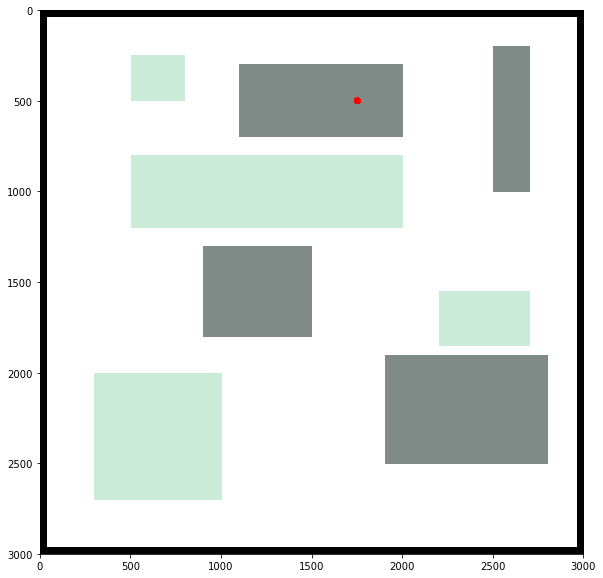

In [133]:
def Draw_map4(Destination_x,Destination_y):
    im4=Image.new('RGB',size=(3000,3000),color=(0,0,0))
    draw=ImageDraw.Draw(im4,mode='RGB')
    draw.rectangle((40,40,2960,2960),(255,255,255),(255,255,255))
    draw.rectangle((500,800,1000,1200),(202,235,216),(202,235,216))
    draw.rectangle((500,800,800,1200),(202,235,216),(202,235,216))
    draw.rectangle((900,1300,1500,1800),(128,138,135),(128,138,135))
    draw.rectangle((2000,800,800,1200),(202,235,216),(202,235,216))
    draw.rectangle((500,250,800,500),(202,235,216),(202,235,216))
    draw.rectangle((2500,200,2700,1000),(128,138,135),(128,138,135))
    draw.rectangle((1100,300,2000,700),(128,138,135),(128,138,135))
    draw.rectangle((2200,1550,2700,1850),(202,235,216),(202,235,216))
    draw.rectangle((300,2000,1000,2700),(202,235,216),(202,235,216))
    draw.rectangle((1900,1900,2800,2500),(128,138,135),(128,138,135))
    draw.ellipse((Destination_x-20,Destination_y-20,Destination_x+20,Destination_y+20), (255,0,0),(255,0,0))
    return im4
im4=Draw_map4(1750,500)
plt.imshow(im4)
plt.show()

In [134]:
Learning_rate=0.0001
State_input=tf.placeholder(tf.float32,[None,Length_state])
Action_input=tf.placeholder(tf.float32,[None,Length_action])
Q_target_output=tf.placeholder(tf.float32,[None])

Layer1_number=200
w1=tf.Variable((tf.random_normal([Length_state,Layer1_number])))*0.01
b1=tf.Variable(tf.zeros([1,Layer1_number]))
l1=tf.nn.relu(tf.matmul(State_input,w1))+b1

Layer12_number=20
w12=tf.Variable((tf.random_normal([Layer1_number,Layer12_number])))*0.01
b12=tf.Variable(tf.zeros([1,Layer12_number]))
l12=tf.nn.relu(tf.matmul(l1,w12))+b12

Layer2_number=Length_action
w2=tf.Variable((tf.random_normal([Layer12_number,Layer2_number])))*0.01
b2=tf.Variable(tf.zeros([1,Layer2_number]))
l2=tf.matmul(l12,w2)+b2


Q_value=tf.reduce_sum(tf.multiply(l2,Action_input),reduction_indices=1)
Loss=tf.reduce_mean(tf.square(Q_value-Q_target_output))
Optimizer=tf.train.AdamOptimizer(learning_rate).minimize(Loss)
Predict=tf.argmax(l2,1)

session=tf.InteractiveSession()
session.run(tf.global_variables_initializer())

def Save_memory(Current_state,Next_action,Next_state,Reward,Arrive):
    Current_state_range=State_list[Current_state:Current_state+1]
    Next_action_range=Action_list[Next_action:Next_action+1]
    Next_state_range=State_list[Next_state:Next_state+1]
    Store_memory.append((Current_state_range,Next_action_range,Next_state_range,Reward,Arrive))
    if len(Store_memory)>Memory_size:
        Store_memory.popleft()
        
def Experience_replay():
    Minibatch=random.sample(Store_memory,Batch_size)
    Batch_current_state = None
    Batch_next_action = None
    Batch_reward = None
    Batch_next_state = None
    Batch_arrive = None
    
    for index in range(Batch_size):
        if Batch_current_state is None:
            Batch_current_state=Minibatch[index][0]
        elif Batch_current_state is not None:
            Batch_current_state=np.vstack((Batch_current_state,Minibatch[index][0]))
        
        if Batch_next_action is None:
            Batch_next_action=Minibatch[index][1]
        elif Batch_next_action is not None:
            Batch_next_action=np.vstack((Batch_next_action,Minibatch[index][1]))
    
        
        if Batch_next_state is None:
            Batch_next_state=Minibatch[index][2]
        elif Batch_next_state is not None:
            Batch_next_state=np.vstack((Batch_next_state,Minibatch[index][2]))
        
        if Batch_reward is None:
            Batch_reward=Minibatch[index][3]
        elif Batch_reward is not None:
            Batch_reward=np.vstack((Batch_reward,Minibatch[index][3]))
    
        if Batch_arrive is None:
            Batch_arrive=Minibatch[index][4]
        elif Batch_arrive is not None:
            Batch_arrive=np.vstack((Batch_arrive,Minibatch[index][4]))
            
    Q_next=session.run(l2,feed_dict={State_input:Batch_next_state})
    Q_target_list=[]
    for i in range(Batch_size):
        Each_reward=Batch_reward[i][0]
        Each_qvalue=Each_reward+Beta*np.max(Q_next[i])
        if Each_reward<0:
            Q_target_list.append(Each_reward)
        else:
            Q_target_list.append(Each_qvalue)

    _,Cost,Reward=session.run([Q_value,Loss,Optimizer],feed_dict={State_input:Batch_current_state,
                                                                         Action_input:Batch_next_action,
                                                                         Q_target_output:Q_target_list})
    if Action_times%5000==0:
        print('Action_times=%d  Loss=%f'%(Action_times,Cost))

In [135]:
def Set_destination(x_range,y_range):
    x=np.random.randint(300,x_range-300)
    y=np.random.randint(300,y_range-300)
    return int(x),int(y)

In [136]:
def Robot_destination(Destination_x,Destination_y,Robot_x,Robot_y,Robot_a):
    Delta_x=Destination_x-Robot_x
    Delta_y=Destination_y-Robot_y
    Distance=np.sqrt(Delta_x*Delta_x+Delta_y*Delta_y)
    Direct_angle=(np.arctan(Delta_y/Delta_x))*180/np.pi
    if Delta_x<0:
        Direct_angle=Direct_angle+180
    True_angle=(Robot_a-Direct_angle)%360
    if True_angle>180:
        return 360-True_angle,'right',Distance
    else:
        return True_angle,'left',Distance

In [137]:
def Is_Crash(Current_x,Current_y,im):
    Crash=False
    Degree=[-150,-120,-90,-60,-30,0,30,60,90,120,150,180]
    Dis=np.arange(0,50,5)
    for i in Dis:
        for j in Degree:
            x=Current_x+i*np.cos(j/180*np.pi)
            y=Current_y+i*np.sin(j/180*np.pi)
            if (im.getpixel((x,y)))==(0,0,0):
                Crash=True
                break
        if Crash==True:
                break
    return Crash
# Is_Crash(10,10,im4)

In [138]:
def Is_arrive(Current_x,Current_y,im):
    Arrive=False
    Crash=False
    Degree=[-150,-120,-90,-60,-30,0,30,60,90,120,150,180]
    Dis=np.arange(0,30,5)
    for i in Dis:
        for j in Degree:
            x=Current_x+i*np.cos(j/180*np.pi)
            y=Current_y+i*np.sin(j/180*np.pi)
            if (im.getpixel((x,y)))==(0,0,0):
                Crash=True
                break
            if (im.getpixel((x,y)))==(255,0,0):
                Arrive=True
                break
        if Arrive==True or Crash==True:
                break
    return Arrive
# print(Is_arrive(1750,500,im4))

In [139]:
def Random_start(x_range,y_range,im):
    a=0
    x=np.random.random()*x_range
    y=np.random.random()*y_range
    while(Is_Crash(x,y,im)==True or Is_arrive(x,y,im)==True):
        x=np.random.random()*x_range
        y=np.random.random()*y_range
    return x,y,a

In [140]:
def Height_level(Current_x,Current_y,Current_a,im):
    Degree=[-60,-30,0,30,60]
    Distance=np.arange(0,50,5)
    Max_height=0
    for i in Degree:
        for j in Distance:
            x=Current_x+i*np.cos((j+Current_a)/180*np.pi)
            y=Current_y+i*np.sin((j+Current_a)/180*np.pi)
            Height_level=0
            if im.getpixel((x,y))==(255,255,255):
                Height_level=0
            elif im.getpixel((x,y))==(202,235,216):
                Height_level=1
            elif im.getpixel((x,y))==(128,138,135):
                Height_level=2
            Max_height=max(Height_level,Max_height)
            if Max_height==2:
                break
        if Max_height==2:
            break
    return Height_level
# Height_level(750,1000,im4)

In [141]:
def Output_state_index(True_angle,Left_right,Distance,Height):
    if 0<=Distance<60:
        Dis_level=0
    elif 60<=Distance<180:
        Dis_level=1
    elif 180<=Distance<250:
        Dis_level=2
    else:
        Dis_level=3
    Angle_level=True_angle//30
    if Left_right=='right':
        Le_ri=1
        State_number=int(Height*48+Dis_level+24*Le_ri+(5-Angle_level)*4)
    elif Left_right=='left':
        Le_ri=0
        Angle_level=True_angle//30
        State_number=int(Height*48+Dis_level+24*Le_ri+Angle_level*4)
    return State_number,Dis_level,Angle_level
# A,B,C=Output_state_index(80,'right',110,1)
# States[A]

In [142]:
def Choose_action(Current_state,Action_times):
    Current_state_range=State_list[Current_state:Current_state+1]
    Epsilon=Epsilon_final+(Epsilon_start-Epsilon_final)*np.exp(-1*Decay_Rate*Action_times)
    if(np.random.random()<Epsilon):
        Next_action=np.random.randint(Length_action)
    else:
        Action_qvalue_output=session.run(l2,feed_dict={State_input:Current_state_range})
        Next_action=np.argmax(Action_qvalue_output)
        
    if Action_times%5000==0:
        print('Action_times=%d  Epsilon=%f Epoche=%d'%(Action_times,Epsilon,Epoche))
    return Next_action

In [143]:
def Next_state_F(Robot_x,Robot_y,Robot_a,Destination_x,Destination_y,Action,im):
    Arrive=False
    Crash=False
    Current_height=Height_level(Robot_x,Robot_y,Robot_a,im)
    
    if Action==0:
        Robot_next_x=Robot_x+Velocity_tripod*np.cos(Robot_a/180*np.pi)
        Robot_next_y=Robot_y+Velocity_tripod*np.sin(Robot_a/180*np.pi)
        if Is_Crash(Robot_next_x,Robot_next_y,im)==True:
            Crash=True
        if Is_arrive(Robot_next_x,Robot_next_y,im)==True:
            Arrive=True
    elif Action==1:
        Robot_next_x=Robot_x+Velocity_quadruped*np.cos(Robot_a/180*np.pi)
        Robot_next_y=Robot_y+Velocity_quadruped*np.sin(Robot_a/180*np.pi)
        if Is_Crash(Robot_next_x,Robot_next_y,im)==True:
            Crash=True
        if Is_arrive(Robot_next_x,Robot_next_y,im)==True:
            Arrive=True
    elif Action==2:
        Robot_next_x=Robot_x+Velocity_onebyone*np.cos(Robot_a/180*np.pi)
        Robot_next_y=Robot_y+Velocity_onebyone*np.sin(Robot_a/180*np.pi)
        if Is_Crash(Robot_next_x,Robot_next_y,im)==True:
            Crash=True
        if Is_arrive(Robot_next_x,Robot_next_y,im)==True:
            Arrive=True
    elif Action==3:
        Robot_a=Robot_a-45
        Robot_next_x=Robot_x
        Robot_next_y=Robot_y
    elif Action==4:
        Robot_a=Robot_a+45
        Robot_next_x=Robot_x
        Robot_next_y=Robot_y
        
   
    
    Next_true_angle,Next_le_ri,Next_distance=Robot_destination(Destination_x,Destination_y,Robot_next_x,Robot_next_y,Robot_a)
    Next_height=Height_level(Robot_next_x,Robot_next_y,Robot_a,im)
    Next_state_number,Next_distance_level,Next_angle_level=Output_state_index(Next_true_angle,Next_le_ri,Next_distance,Next_height)
    
    if (Current_height==2 and Action==0) or (Current_height==2 and Action==1):
        Reward=-2
    elif(Current_height==1 and Action==0) or (Current_height==1 and Action==2):
        Reward=-2
    elif(Current_height==0 and Action==1) or (Current_height==0 and Action==2):
        Reward=-2
    else:
        if Arrive==False:
            Reward=(-Next_distance_level-Next_angle_level*0.5)*0.01
        else:
            Reward=5
    return Robot_next_x,Robot_next_y,Robot_a,Reward,Next_state_number,Arrive,Crash

In [144]:
def Run_function():
    global Epoche
    global Action_times
    global Vector_x
    global Vector_y
    Crash_=False
    Arrive_=False
    Destination_x,Destination_y=Set_destination(3000,3000)
    im4=Draw_map4(Destination_x,Destination_y)
#     plt.imshow(im4)
#     plt.show()
    Current_x,Current_y,Current_a=Random_start(3000,3000,im4)
    Epoche_false=0
    while Epoche_false<200:
        True_a,Le_ri,Distance=Robot_destination(Destination_x,Destination_y,Current_x,Current_y,Current_a)
        Height_level_=Height_level(Current_x,Current_y,Current_a,im4)
        Current_state_number,Distance_level,Angle_level=Output_state_index(True_a,Le_ri,Distance,Height_level_)
        Next_action=Choose_action(Current_state_number,Action_times)
        Next_x,Next_y,Next_a,Reward,Next_state_number,Arrive,Crash=Next_state_F(Current_x,Current_y,Current_a,Destination_x,Destination_y,Next_action,im4)
        if Crash==True:
            Next_x,Next_y,Next_a=Random_start(3000,3000,im4)
        else:
            Save_memory(Current_state_number,Next_action,Next_state_number,Reward,Arrive)
            if Action_times>Observe:
                Experience_replay()
            if Arrive:
                Destination_x,Destination_y=Set_destination(3000,3000)
                im4=Draw_map4(Destination_x,Destination_y)
                Next_x,Next_y,Next_a=Random_start(3000,3000,im4)
                Epoche_false+=1
                Epoche+=1
        Current_x=Next_x
        Current_y=Next_y
        Current_a=Next_a
        Action_times+=1

In [148]:
Run_function()

Action_times=425000  Epsilon=0.657232 Epoche=200
Action_times=425000  Loss=0.000114
Action_times=430000  Epsilon=0.654004 Epoche=204
Action_times=430000  Loss=0.000048
Action_times=435000  Epsilon=0.650792 Epoche=208
Action_times=435000  Loss=0.004349
Action_times=440000  Epsilon=0.647596 Epoche=209
Action_times=440000  Loss=0.000067
Action_times=445000  Epsilon=0.644416 Epoche=212
Action_times=445000  Loss=0.037830
Action_times=450000  Epsilon=0.641252 Epoche=215
Action_times=450000  Loss=0.000228
Action_times=455000  Epsilon=0.638103 Epoche=217
Action_times=455000  Loss=0.005698
Action_times=460000  Epsilon=0.634971 Epoche=221
Action_times=460000  Loss=0.005393
Action_times=465000  Epsilon=0.631854 Epoche=222
Action_times=465000  Loss=0.000510
Action_times=470000  Epsilon=0.628752 Epoche=223
Action_times=470000  Loss=0.002386
Action_times=475000  Epsilon=0.625666 Epoche=227
Action_times=475000  Loss=0.000156
Action_times=480000  Epsilon=0.622596 Epoche=229
Action_times=480000  Loss=0

In [149]:
After_Q=session.run(l2,feed_dict={State_input:State_list})
Max_qaction=np.argmax(After_Q,axis=1)
Show_table=pd.DataFrame([States,Max_qaction]).T
Show_table[Show_table==0]='FrontH0'
Show_table[Show_table==1]='FrontH1'
Show_table[Show_table==2]='FrontH2'
Show_table[Show_table==3]='left'
Show_table[Show_table==4]='right'
Show_table



,0,1
0,L60D0/30/H0,FrontH0
1,L180D0/30/H0,right
2,L250D0/30/H0,right
3,L300D0/30/H0,right
4,L60D30/60/H0,FrontH0
5,L180D30/60/H0,right
6,L250D30/60/H0,right
7,L300D30/60/H0,right
8,L60D60/90/H0,FrontH0
9,L180D60/90/H0,right
